In [1]:
import sys
import os
sys.path.append(os.path.abspath("../"))  # or "../../" depending on location

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
# from utils.likelihood import *
from utils.formate_matrix_toMLData import *
from models.model_0929 import *
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams["font.size"] = 22
np.set_printoptions(suppress=True)


In [3]:
# load virtual data
data_dir = "/media/user/TRANSCEND/datas/testdata_n800"
# data_dir = "/Volumes/TRANSCEND/datas/test_data"
test_states = []
test_del_t = []
test_targets = []
# dataset = []
formater = formate_dataMatrix()

# 読み込む対象の拡張子（例: .csv のみに限定）
VALID_EXTENSIONS = (".csv", ".txt")
IGNORED_PREFIXES = ("._", ".DS_Store", "Thumbs.db")

# ファイルを処理する関数
def process_file(file_path, states_sets, delt_sets, true_sets,targets_sets):
    try:
        print("Processing:", file_path)
        with open(file_path, 'rb') as f:
            all_matrix = np.loadtxt(f, delimiter=",")

        tm = matrix_trimer(all_matrix)
        true_trm = tm.trim_transitionRateMatrix(start = 0, end = 4)
        true_vec = np.array(formater.GetOutputVector_byDiagonal(true_trm))
        
        ll_trm = tm.trim_transitionRateMatrix(start = 4, end = 8)
        data = tm.trim_data(start = 8)
        output_vec = np.array(formater.GetOutputVector_byDiagonal(ll_trm))

        # state: shape (2, num_samples_i)
        state = np.stack([data[:, 0], data[:, 1]], axis=0)
        states_sets.append(state)
        delt_sets.append(data[:, 2])
        true_sets.append(true_vec)
        targets_sets.append(output_vec)

    except Exception as e:
        print(f"❌ Skipping file: {file_path} (Reason: {e})")

# ディレクトリ内のファイルを一括処理
def process_all_files_in_directory(directory, func, states_sets, delt_sets, true_sets,targets_sets):
    for filename in os.listdir(directory):
        if filename.startswith(IGNORED_PREFIXES):
            continue
        if not filename.endswith(VALID_EXTENSIONS):
            continue

        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            func(file_path,states_sets, delt_sets, true_sets,targets_sets)

# 実行
# process_all_files_in_directory(data_dir,process_file, test_states, test_del_t, test_targets)



# # データセットとデータローダーの作成
# test_dataset = varSets_Datasets(test_states, test_del_t, test_targets)
# use_cuda = torch.cuda.is_available()
# test_dataloader = DataLoader(
#     test_dataset,
#     batch_size=1,
#     shuffle=False,
#     collate_fn=collate_fn,
#     pin_memory=use_cuda,
# )
# data_iter = iter(test_dataloader)

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

model = DeepSets_varSets_forDiagnel(device=device)
model.load_state_dict(torch.load("../model_weights/mixed_distribution/mixed_0929.pth", map_location=device))
model.eval()

/tmp/ipykernel_5116/3708448978.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("../model_weights/mixed_distribution/mixed_0929.pth", map

DeepSets_varSets_forDiagnel(
  (embedding): Embedding(5, 16, padding_idx=0)
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (ln1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (ln2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (drop): Dropout(p=0.2, inplace=False)
  (att_fc): Linear(in_features=512, out_features=512, bias=True)
  (att_score): Linear(in_features=512, out_features=1, bias=True)
  (out_fc1): Linear(in_features=512, out_features=128, bias=True)
  (out_ln1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (out_fc2): Linear(in_features=128, out_features=64, bias=True)
  (out_ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (out_fc3): Linear(in_features=64, out_features=3, bias=True)
)

In [5]:
#データセットごとの読み込み
dataset_list = [200,400,600,800,1000]
states_sets = []
del_t_sets = []
true_sets = []
targets_sets = []
for dataset_size in dataset_list:
    states = []
    del_ts = []
    trues = []
    targets = []
    process_all_files_in_directory(data_dir,process_file, states, del_ts, trues,targets)
    states_sets.append(states)
    del_t_sets.append(del_ts)
    true_sets.append(trues)
    targets_sets.append(targets)


    
    
    

Processing: /media/user/TRANSCEND/datas/testdata_n800/12_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/62_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/36_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/11_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/15_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/1_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/50_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/16_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/2_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/28_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/7_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/65_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/57_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/21_800_4.csv
Processing: /media/user/TRANSCEND/datas/testdata_n800/17_800_4.cs

In [6]:
loss_list = []
outs_lifespan = []
true_lifespan = []

class all_lifespan_loss(nn.Module):
    def forward(self, outputs, targets):
        
        y_pred_inverse = 1.0 / (outputs)
        y_true_inverse = 1.0 / (targets)

        # 逆数の差の絶対値
        loss_tensor = torch.abs(y_pred_inverse - y_true_inverse)[0]
        return loss_tensor, y_true_inverse[0], y_pred_inverse

criterion = all_lifespan_loss()

# for states, delta_t, targets, lengths in data_iter:
#     with torch.no_grad():
#         states = states.to(device, non_blocking=True).long()
#         delta_t = delta_t.to(device, non_blocking=True).float()
#         targets = targets.to(device, non_blocking=True).float()
#         lengths = lengths.to(device, non_blocking=True).long()

#         outputs = model(states, delta_t, lengths)[0]
#         loss_tensor, true_expect, pred_expect = criterion(outputs, targets)

#         true_expect_cpu = true_expect.detach().cpu()
#         pred_expect_cpu = pred_expect.detach().cpu()
#         batch_loss = torch.abs(true_expect_cpu - pred_expect_cpu)

#         true_lifespan.extend(true_expect_cpu.tolist())
#         outs_lifespan.extend(pred_expect_cpu.tolist())
#         loss_list.extend(batch_loss.tolist())

# df = pd.DataFrame({
#     "true": true_lifespan,
#     "pred": outs_lifespan,
#     "loss": loss_list,
# })

In [7]:
#データセットごとの推論
loss_lists = []
outs_lifespan_sets = []
ll_lifespan_sets = []
true_lifespan_sets = []

for i in range(len(dataset_list)):
    true_lifespan = []
    for j in range(len(true_sets[i])):
        
        for k in range(3):
            true_lifespan.append(1/true_sets[i][j][k])
        
    true_lifespan_sets.append(true_lifespan)

for i in range(len(dataset_list)):
    states = states_sets[i]
    del_ts = del_t_sets[i]
    targets = targets_sets[i]

    test_dataset = varSets_Datasets(states, del_ts, targets)
    use_cuda = torch.cuda.is_available()
    test_dataloader = DataLoader(
        test_dataset,
        batch_size=1,
        shuffle=False,
        collate_fn=collate_fn,
        pin_memory=use_cuda,
    )
    data_iter = iter(test_dataloader)

    loss_list = []
    outs_lifespan = []
    ll_lifespan = []

    for states, delta_t, targets, lengths in data_iter:
        with torch.no_grad():
            states = states.to(device, non_blocking=True).long()
            delta_t = delta_t.to(device, non_blocking=True).float()
            targets = targets.to(device, non_blocking=True).float()
            lengths = lengths.to(device, non_blocking=True).long()

            outputs = model(states, delta_t, lengths)[0]
            loss_tensor, true_expect, pred_expect = criterion(outputs, targets)
            print("===")
            print("---")
            print(loss_tensor,true_expect, pred_expect)
            ll_expect_cpu = true_expect.detach().cpu()
            pred_expect_cpu = pred_expect.detach().cpu()
            batch_loss = torch.abs(ll_expect_cpu - pred_expect_cpu)
            print("---")
            print(ll_expect_cpu,pred_expect_cpu,batch_loss)
            ll_lifespan.extend(ll_expect_cpu.tolist())
            outs_lifespan.extend(pred_expect_cpu.tolist())
            loss_list.extend(batch_loss.tolist())

    loss_lists.append(loss_list)
    outs_lifespan_sets.append(outs_lifespan)
    ll_lifespan_sets.append(ll_lifespan)

===
---
tensor([1.5003, 1.2457, 1.0917], device='cuda:0') tensor([80.7238, 82.6720, 42.3032], device='cuda:0') tensor([79.2235, 83.9176, 43.3949], device='cuda:0')
---
tensor([80.7238, 82.6720, 42.3032]) tensor([79.2235, 83.9176, 43.3949]) tensor([1.5003, 1.2457, 1.0917])
===
---
tensor([4.6533, 0.8831, 0.6076], device='cuda:0') tensor([98.0258, 44.6199, 37.8431], device='cuda:0') tensor([93.3725, 45.5030, 38.4507], device='cuda:0')
---
tensor([98.0258, 44.6199, 37.8431]) tensor([93.3725, 45.5030, 38.4507]) tensor([4.6533, 0.8831, 0.6076])
===
---
tensor([ 2.9216, 27.8100,  1.3257], device='cuda:0') tensor([ 21.4051, 122.7224,  92.7524], device='cuda:0') tensor([24.3267, 94.9124, 91.4267], device='cuda:0')
---
tensor([ 21.4051, 122.7224,  92.7524]) tensor([24.3267, 94.9124, 91.4267]) tensor([ 2.9216, 27.8100,  1.3257])
===
---
tensor([0.0289, 1.5734, 0.0161], device='cuda:0') tensor([37.8250, 78.2717, 78.8031], device='cuda:0') tensor([37.8539, 76.6983, 78.7869], device='cuda:0')
---
t

---
600
600
600
---
600
600
600
---
600
600
600
---
600
600
600
---
600
600
600


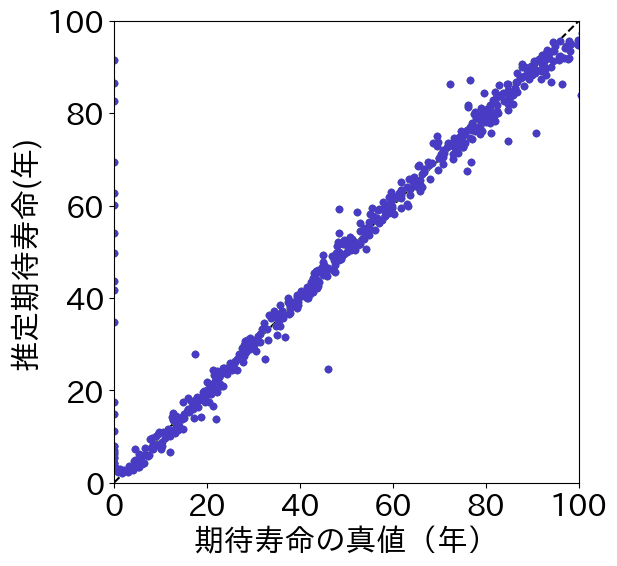

In [8]:
plt.figure(figsize=(6,6))
x = np.linspace(0, 100, 1000)
color_list = ["#d69c6a", "#acf087", "#8fc8bb", "#6a7ed6", "#493bc4"]
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel("期待寿命の真値（年）")
plt.ylabel("推定期待寿命(年)")
plt.plot(x,x,color="#000000", linestyle = '--',zorder= 0)
for i in range(len(dataset_list)):
    print("---")
    print(len(ll_lifespan_sets[i]))
    print(len(outs_lifespan_sets[i]))
    print(len(loss_lists[i]))
    df = pd.DataFrame({
        "true": ll_lifespan_sets[i],
        "pred": outs_lifespan_sets[i],
        "loss": loss_lists[i],
    })
    plt.scatter(df["true"],df["pred"],color = color_list[i],edgecolors=color_list[i],s = 20,  zorder= 1)
# plt.scatter(df["true"],df["pred"],color = "#d69c6a",edgecolors="#d79e6b",s = 20,  zorder= 1)
plt.show()


In [9]:
print(len(ll_lifespan_sets),len(ll_lifespan_sets[0]))
print(len(true_lifespan_sets),len(true_lifespan_sets[0]))

5 600
5 600


In [16]:
gap_ll = []
gap_eval = []
for i in range(len(dataset_list)):
    l = []
    e = []
    for j in range(len(true_lifespan_sets[i])):
        
        e.append(abs(true_lifespan_sets[i][j]-outs_lifespan_sets[i][j]))
        l.append(abs(true_lifespan_sets[i][j]-ll_lifespan_sets[i][j]))
        
    gap_ll.append(l)
    gap_eval.append(e)
            
    

In [17]:
print(gap_ll[0])

[np.float64(4.728238709021483), np.float64(0.0548484768060149), np.float64(2.1635256484820786), np.float64(0.40102575314003275), np.float64(3.1996301411519923), np.float64(5.3399169466161), np.float64(1.7800577232685484), np.float64(28.086039440971902), np.float64(1.8209796738177886), np.float64(8.798346314377007), np.float64(4.769367584013182), np.float64(11.608596837775949), np.float64(7.7190265714029636), np.float64(3.370928438118881), np.float64(5.723031759455608), np.float64(6.0597015461284585), np.float64(2.9680124465929865), np.float64(0.1800862801167824), np.float64(9.9891752541172), np.float64(3.8617039021123105), np.float64(6.742739230816994), np.float64(96.71185143903136), np.float64(0.5541387012417758), np.float64(2.140239480659318), np.float64(7.69656289247169), np.float64(4.2074356754219195), np.float64(3.897925427201116), np.float64(21.67927442766826), np.float64(2.683752957782147), np.float64(20.35169661138694), np.float64(1.9165369094162799), np.float64(9.5387057805085

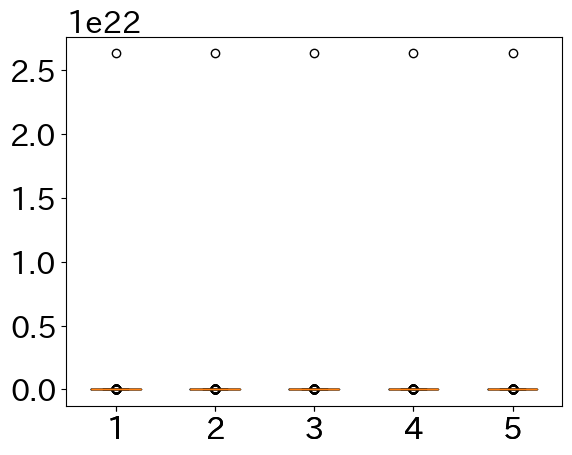

In [18]:
plt.boxplot(gap_ll)
plt.boxplot(gap_eval)
plt.show()

ValueError: supplied range of [0.00229644775390625, inf] is not finite

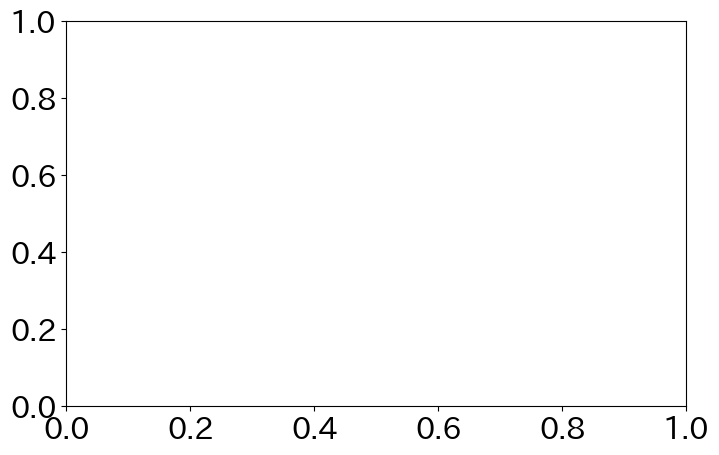

In [12]:
p95 = np.percentile(df["loss"], 95)

plt.figure(figsize=(8, 5))
plt.hist(df["loss"], bins=100, edgecolor="black", alpha=0.7)
plt.axvline(p95, color="red", linestyle="--", linewidth=2, label=f"95%  {p95:.2f}年")


plt.xlabel("期待寿命誤差 (年)")
plt.ylabel("頻度")
# plt.title("Histogram of Loss with 95th Percentile")
plt.legend()
plt.show()